Lecture 3: Numerical Solution of ODEs
===

Forward Euler Method
---

We want to integrate
$$
\frac{d u}{dt} = f(t, u), \quad u(0) = u_0.
$$

The Forward Euler rule is then,

\begin{align}
t_{n+1} &= t_n + h \\
u_{n+1} &= u_n + h f(t_n, u_n),
\end{align}

for some step size $h$.

In [5]:
using PyPlot
PyPlot.svg(true)

true

In [6]:
function euler_method(f, t0, u0, h, N)
    # Integrate u' = f(u) from (t0, u0) using the Euler method with stepsize
    # h and N steps
    
    ts = collect(t0 .+ h*(0:N))
    us = zeros(size(ts))
    us[1] = u0
    
    for i=1:N
        us[i+1] = us[i] + h*f(us[i]) 
    end
    
    return ts, us
end

euler_method (generic function with 1 method)

In [7]:
f(u) = -2u

ts, us = euler_method(f, 0, 1.0, 0.1, 20)

# exact solution
ts_ex = LinRange(0, 2, 100)
us_ex = exp.(-2ts_ex);

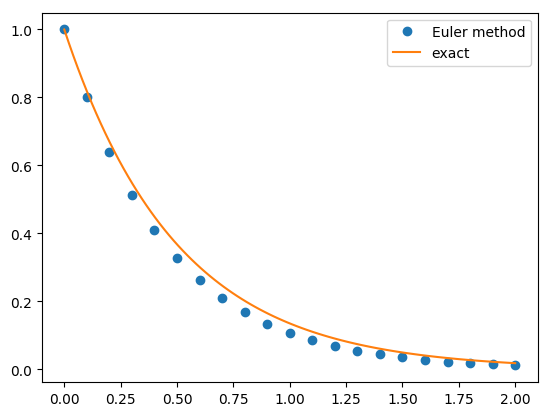

PyObject <matplotlib.legend.Legend object at 0x7efd709a37b8>

In [8]:
figure()
plot(ts, us, "o", label="Euler method")
plot(ts_ex, us_ex, label="exact")
legend()

Improved Euler Method
---

We want to integrate
$$
\frac{d u}{dt} = f(t, u), \quad u(0) = u_0.
$$

The Improved Euler rule is then,

\begin{align}
t_{n+1} &= t_n + h \\
u_{n+1} &= u_n + h f(t_{n+1}, u_{n+1}^{Euler})
\end{align}

for some step size $h$ and the usual Forward Euler step $u^{Euler}$.

In [9]:
function improved_euler_method(f, t0, u0, h, N)
    # Integrate u' = f(u) from (t0, u0) using the improved Euler method with stepsize
    # h and N steps
    
    ts = collect(t0 .+ h*(0:N))
    us = zeros(size(ts))
#     us_Euler = zeros(size(ts))
    
#     us_Euler[1] = u0
    us[1] = u0
    
    for i=1:N
        us_Euler = us[i] + h*f(us[i])
        
        us[i+1] = us[i] + h/2 * ( f(us[i]) + f(us_Euler) )
    end
    
    return ts, us
end

improved_euler_method (generic function with 1 method)

In [10]:
f(u) = -2u

ts, us = improved_euler_method(f, 0, 1.0, 0.1, 20)

# exact solution
ts_ex = LinRange(0, 2, 100)
us_ex = exp.(-2ts_ex);

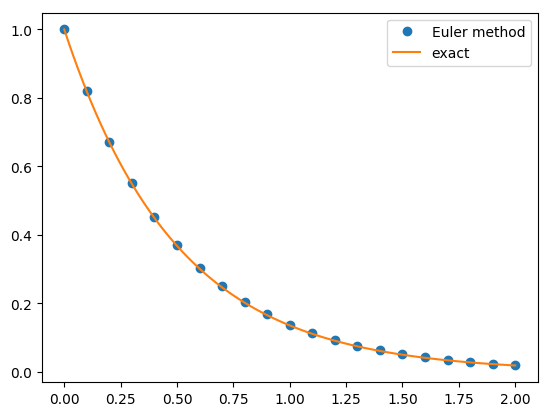

PyObject <matplotlib.legend.Legend object at 0x7efd7099e470>

In [11]:
figure()
plot(ts, us, "o", label="Euler method")
plot(ts_ex, us_ex, label="exact")
legend()

Errors for Forward and Improved Euler methods
---

In [12]:
# We compare the total error for various stepsizes

f(u) = -3u
u_exact(t) = exp.(-3t)

hs = [0.5, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]

errors_forward = [ sum(abs.((euler_method(f, 0, 1.0, h, 20)[2] - u_exact.(h*collect(0:20))))) for h in hs ]
errors_improved = [ sum(abs.(improved_euler_method(f, 0, 1.0, h, 20)[2] - u_exact.(h*collect(0:20)))) for h in hs ]

7-element Array{Float64,1}:
 1.3793118864423999   
 0.06225293524910611  
 0.0006483641692353048
 9.091771047131658e-7 
 9.413481105724486e-10
 9.461320615855584e-13
 9.992007221626409e-16

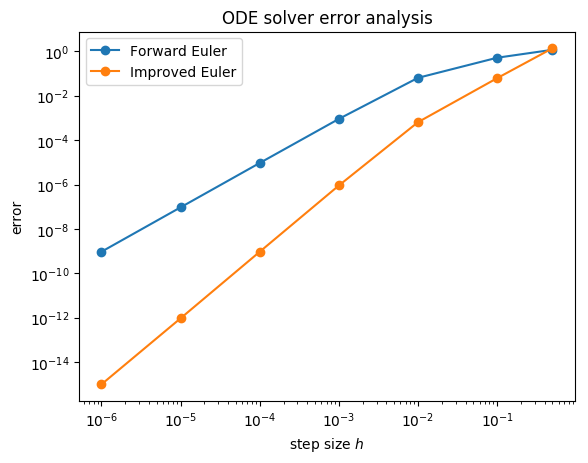

PyObject <matplotlib.legend.Legend object at 0x7efd70952f60>

In [13]:
loglog(hs, errors_forward, "o-", label="Forward Euler")
loglog(hs, errors_improved, "o-", label="Improved Euler")

xlabel(L"step size $h$")
ylabel("error")
title("ODE solver error analysis")
legend()

Stability of ODE solvers
---

When choosing a solver and a step size, we would like
the numerical approximation to have the same long-time characteristics as
the true solution.

This is quantified by a test problem,

$$
\frac{du}{dt} = -\lambda u, \quad \operatorname{Re}(\lambda) > 0.
$$

Here, the true solution decays:

$$
u(t) = u_0\, e^{-\lambda t}.
$$

We call a numerical integrator *stable* if the approximate solution
decays for all stepsizes and all $\lambda$, and *conditionally stable*,
if there are values of $h$ for which the approxmation does not decay.

Stability of the forward Euler method
---

The Forward Euler iteration gives

$$
u_n = (1 - h\, \lambda)^n u_0,
$$

which decays for

$$
h < \frac{2}{\lambda}.
$$

In [ ]:
f(u) = -5u
u_exact(t) = exp.(-5t)

# evaluate exact result
ts_exact = LinRange(0, 0.8, 100)
us_exact = u_exact.(ts_exact)

h_crit = 2/5

ts, us_euler_crit = euler_method(f, 0.0, 1.0, h_crit, 20)
ts, us_euler_crit_above = euler_method(f, 0.0, 1.0, 1.2h_crit, 20)
ts, us_euler_crit_below = euler_method(f, 0.0, 1.0, 0.8h_crit, 20)
ts, us_euler_good = euler_method(f, 0.0, 1.0, 0.1h_crit, 20)

In [ ]:
figure()

plot(ts_exact, us_exact, label="exact solution")

plot(ts, us_euler_crit, "o-", label=L"h = h_{crit}")
# plot(ts, us_euler_crit_above, "o-", label=L"h = 1.2\, h_{crit}")
# plot(ts, us_euler_crit_below, "o-", label=L"h = 0.8\, h_{crit}")
# plot(ts, us_euler_good, "o-", label=L"h = 0.1\, h_{crit}")

title("Stability of the Euler method")
xlabel(L"t")
ylabel(L"u_n^h")

legend()

Implicit Euler
---

The Implicit Euler method is defined by

$$
u_{n+1} = u_n + h f(t_{n+1}, u_{n+1}).
$$

For linear ODEs $u' = -\lambda u$ we find

$$
u_n = \frac{1}{(1 + h \lambda)^n} u_0
$$

In [ ]:
function implicit_euler_linear(λ, t0, u0, h, N)
    # Implement the implicit Euler method for linear equations
    # of the type u'= -λ u.
    
    ts = collect(t0 .+ h*(0:N))
    
    us = zeros(N + 1)
    us[1] = u0
    
    for i=1:N
        us[i+1] = us[i]/(1 + h*λ)
    end
    
    return ts, us
end

In [ ]:
u_exact(t) = exp.(-5t)

# evaluate exact result
ts_exact = LinRange(0, 1.0, 100)
us_exact = u_exact.(ts_exact)

h_crit = 2/5

ts_crit, us_euler_crit = implicit_euler_linear(5, 0.0, 1.0, h_crit, 20)
ts_crit_above, us_euler_crit_above = implicit_euler_linear(5, 0.0, 1.0, 1.2h_crit, 20)
ts_crit_below, us_euler_crit_below = implicit_euler_linear(5, 0.0, 1.0, 0.8h_crit, 20)
ts_good, us_euler_good = implicit_euler_linear(5, 0.0, 1.0, 0.1h_crit, 20)

In [ ]:
figure()

title("Stability of the implicit Euler method")
plot(ts_exact, us_exact, label="exact solution")

plot(ts_crit, us_euler_crit, "o-", label=L"h = h_{crit}")
plot(ts_crit_above, us_euler_crit_above, "o-", label=L"h = 1.2\, h_{crit}")
plot(ts_crit_below, us_euler_crit_below, "o-", label=L"h = 0.8\, h_{crit}")
plot(ts_good, us_euler_good, "o-", label=L"h = 0.1\, h_{crit}")


xlabel(L"t")
ylabel(L"u_n^h")
xlim(0, 0.8)

legend()

Stiff ODEs
---

Stiff ODEs are characterized by having dynamics on several widely
varying time scales. In the linear case,

$$
\frac{d \mathbf{u}}{d t} = A \mathbf{u},
$$

this means that the eigenvalues of the matrix $A$ vary widely in scale:

$$
\left|\frac{\lambda_{max}}{\lambda_{min}}\right| \gg 1.
$$
(Compare this to the condition number of the matrix. Stiff problems are ill-conditioned.)

Often, this requires implicit solvers.

In [ ]:
using LinearAlgebra

function euler_method_linear(A, t0, u0, h, N)
    # Integrate u' = A u from (t0, u0) using the Euler method with stepsize
    # h and N steps
    
    ts = collect(t0 .+ h*(0:N))
    us = zeros(size(ts)[1], size(A)[1])
    us[1,:] = u0
    
    for i=1:N
        us[i+1,:] = us[i,:] + h*A*us[i,:] 
    end
    
    return ts, us
end

In [ ]:
# Simple, nonstiff example
A = [-1.0 -1.9
     0.5 -2.0]

println("Eigenvalues of A: ", eigvals(A))

In [ ]:
u0 = [1, -1]

h = 0.1
ts, us = euler_method_linear(A, 0, u0, h, Int64(3.0/h));

In [ ]:
figure()

title("Non-stiff system of ODEs")
plot(ts, us[:,1], "o-", label=L"u_1(t)")
plot(ts, us[:,2], "o-", label=L"u_2(t)")

legend()
xlabel("t")

In [ ]:
# Stiff example

A = [0.0 1.0
     -1000 -1001]

println("Eigenvalues of A: ", eigvals(A))

In [ ]:
u0 = [1, -1]

h = 0.1
ts, us = euler_method_linear(A, 0, u0, h, Int64(1/h));

In [ ]:
figure()

title("Stiff system of ODEs, Forward Euler")
plot(ts, us[:,1], ".-", label=L"u_1(t)")
plot(ts, us[:,2], ".-", label=L"u_2(t)")

legend()
xlabel("t")

In the stiff example we needed a crazy stepsize given that the true solution is

$
    u_1(t) = -\frac{1}{999} e^{-1000t} + \frac{1000}{999} e^{-t} \approx e^{-t},
$

which is very smooth.

In [ ]:
function implicit_euler_linear(A, t0, u0, h, N)
    # Integrate u' = A u from (t0, u0) using the Euler method with stepsize
    # h and N steps
    
    ts = collect(t0 .+ h*(0:N))
    us = zeros(size(ts)[1], size(A)[1])
    us[1,:] = u0
    
    for i=1:N
        # backslash operator solves the linear system
        us[i+1,:] = (I - h*A) \ us[i,:] 
    end
    
    return ts, us
end

In [ ]:
# Stiff example

A = [0.0 1.0
     -1000 -1001]

println("Eigenvalues of A: ", eigvals(A))

u0 = [1, -1]

h = 0.1
ts, us = implicit_euler_linear(A, 0, u0, h, Int64(1/h));

In [ ]:
figure()

title("Stiff system of ODEs, Implicit Euler")
plot(ts, us[:,1], "o-", label=L"u_1(t)")
plot(ts, us[:,2], "o-", label=L"u_2(t)")

legend()
xlabel("t")

Much better with an implicit method (but slower)
---